## Traffic Flow: Part A

In [438]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### Parameters

In [439]:
nx=51
V_max = 80
L=11
dx = L/(nx-1)
rho_max = 250
dt = 0.001

### Initial Conditions for t = 0

In [440]:
def initial_conditions(nx):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    
    rho = numpy.ones(nx)*10  # 10 is the boundary condition
    rho[10:20] = 50
    
    return rho

In [441]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10  # 10 is the boundary condition
rho0[10:20] = 50
rho0 = initial_conditions(nx)

#### Density

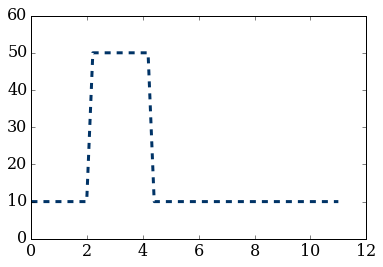

In [442]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

#### Velocity

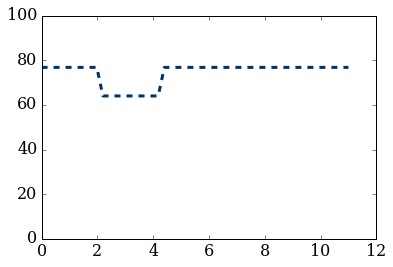

In [443]:
vel_t0 = V_max*(1-(rho0/float(rho_max)))
pyplot.plot(x, vel_t0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,100);

### Helper Functions

#### Velocity conversion function

In [444]:
def conversion(v):
    return (v*1000) / (60 * 60)

#### Velocity function

In [445]:
def Velocity(V_m, rho, rho_m):
    return V_m * (1 - rho / rho_m)

#### Flux function

In [446]:
def computeF(u_max, rho_max, rho):
    """Computes flux F=V*rho

    Parameters
    ----------
    u_max  : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

#### compute solution

In [447]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))   
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()  #rho_n = rho.copy()  

    for t in range(1, nt):  
        F = computeF(u_max, rho_max, rho)
        # when I include F in computation it explodes
        #rho_n[t,1:] = rho[1:] + dt/(dx*rho_max) * (rho_n[t-1,0:-1]-rho_n[t-1,1:])
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n  
    

### Question: Minimum velocity at t = 0

In [448]:
vel_t0 = Velocity(V_max, rho0, rho_max)
min_vel = conversion(min(vel_t0))
print("The minimum velocity at t=0 is {}.".format(min_vel))

The minimum velocity at t=0 is 17.77777777777778.


### Loop Computtaion

In [449]:
nt = 120 #250  # run for 6 mins

rho = ftbs(rho0, nt, dt, dx, rho_max, V_max)
#rho

### Animation

In [450]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


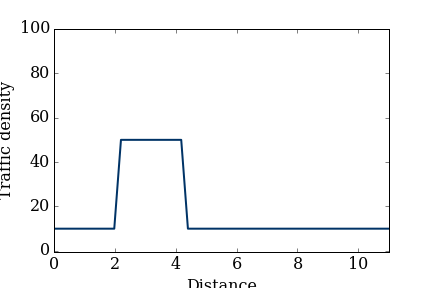
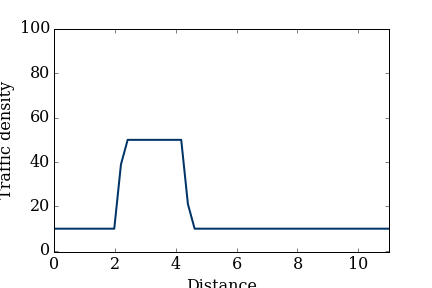
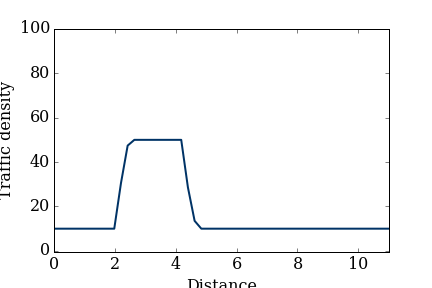
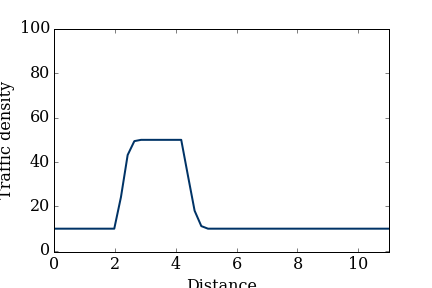
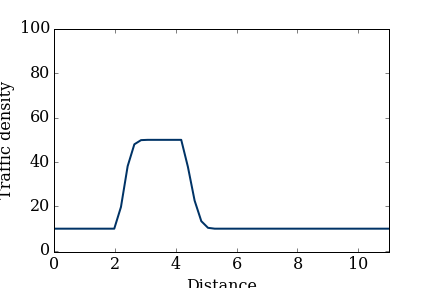
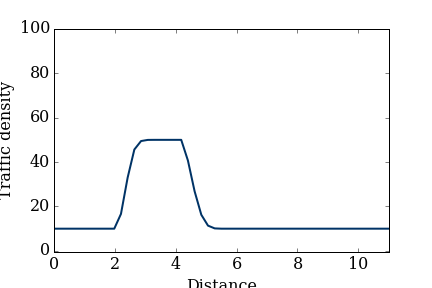
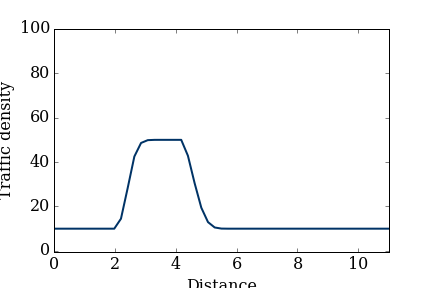
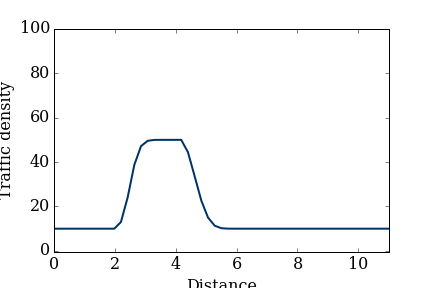
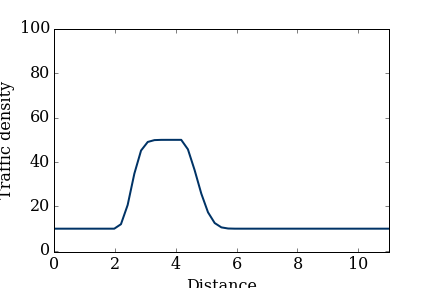
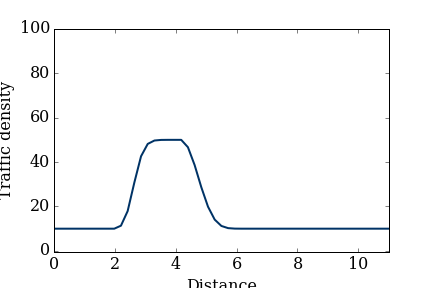
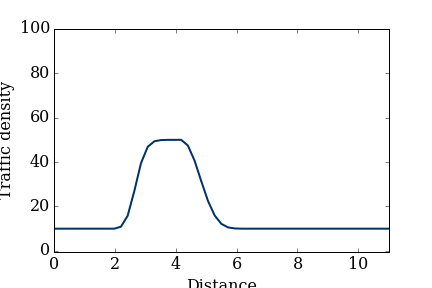
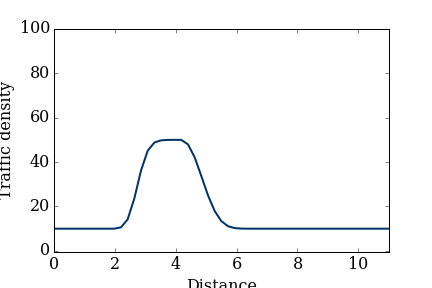
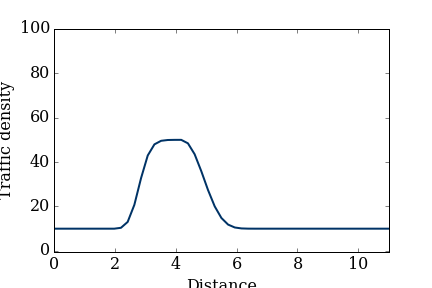
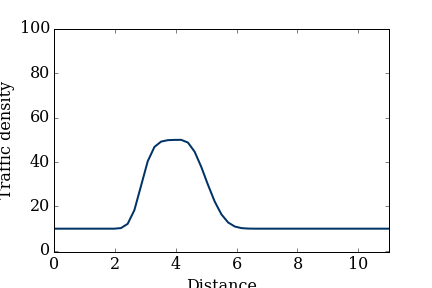
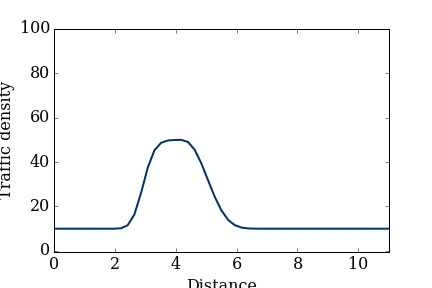
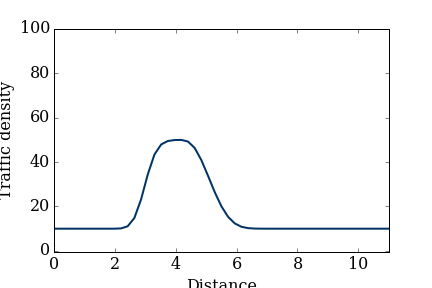
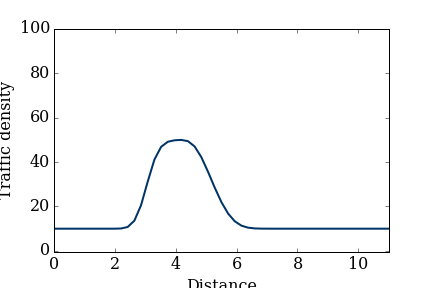
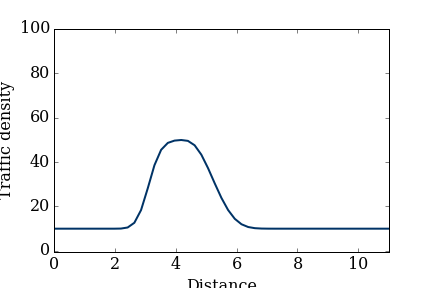
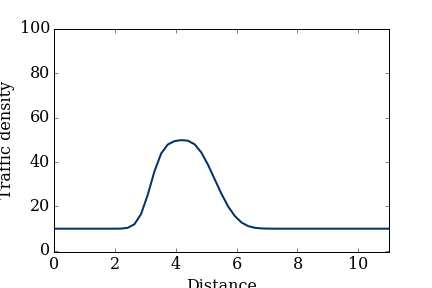
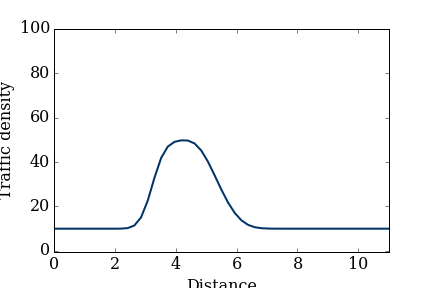
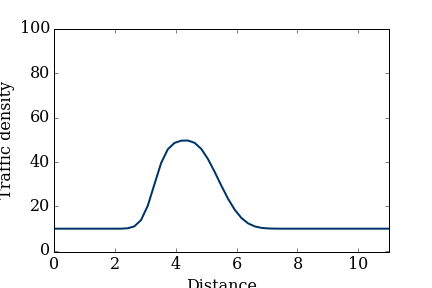
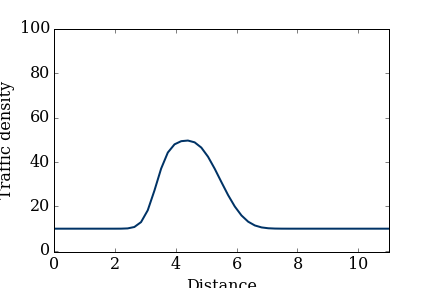
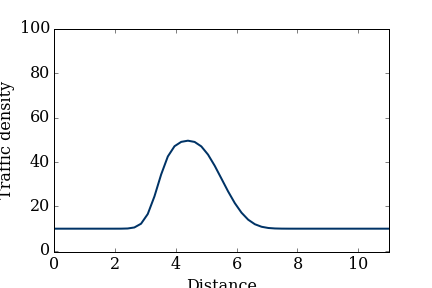
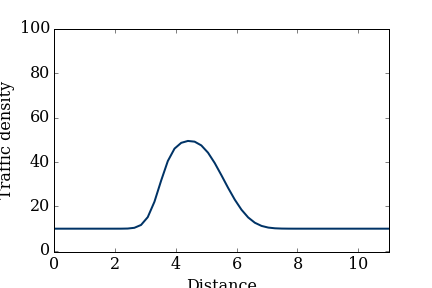
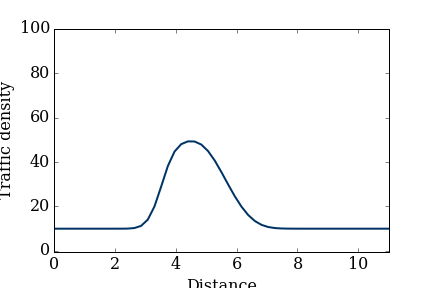
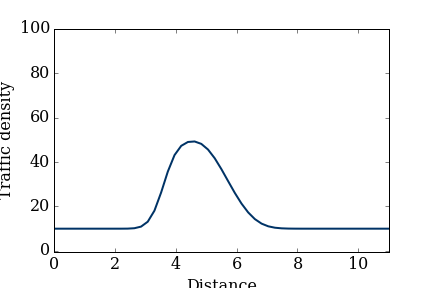
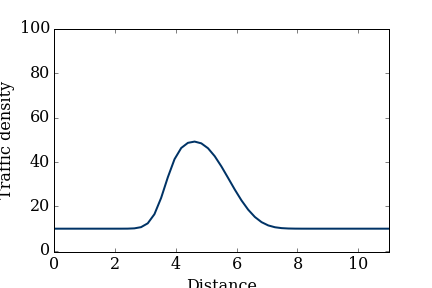
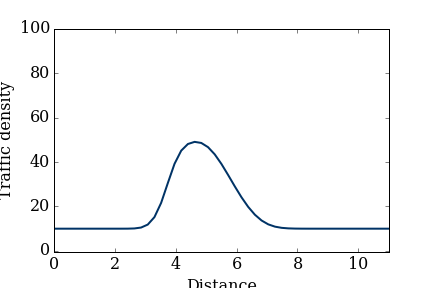
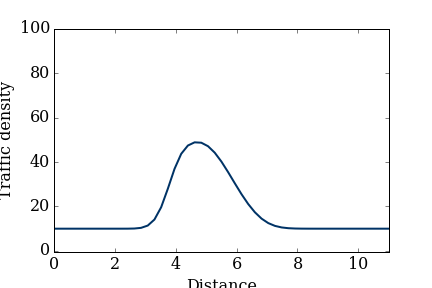
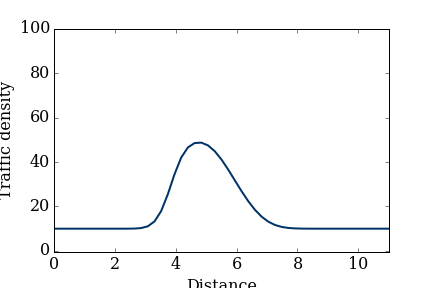
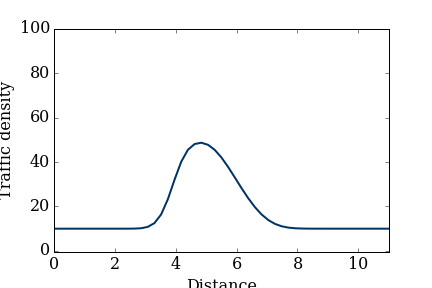
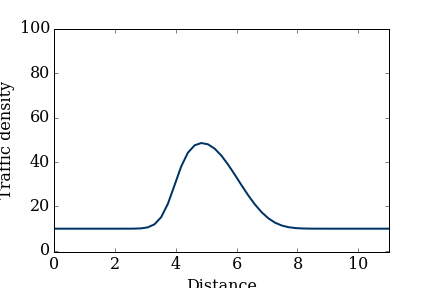
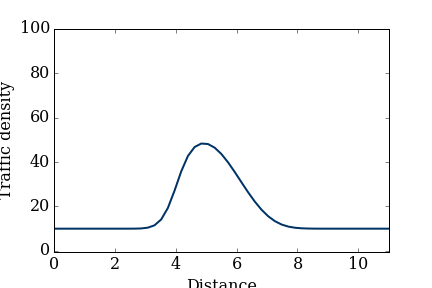
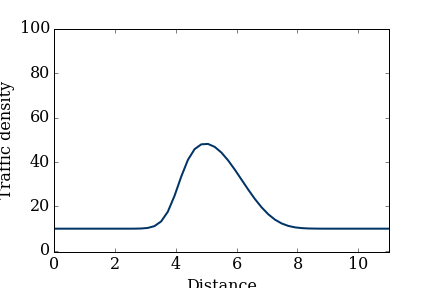
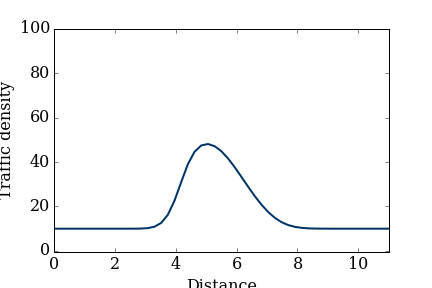
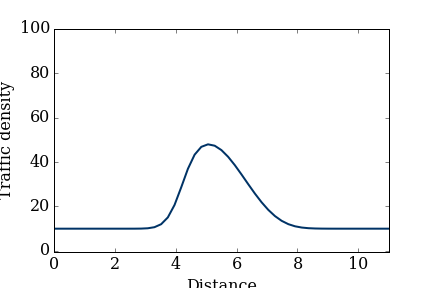
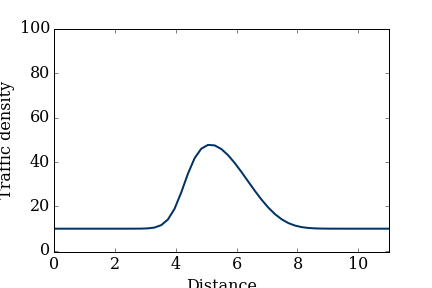
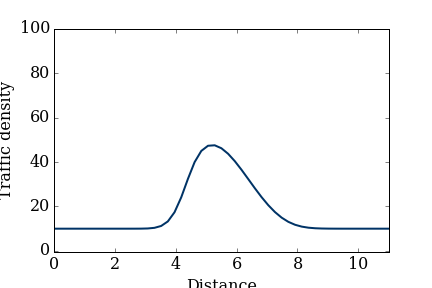
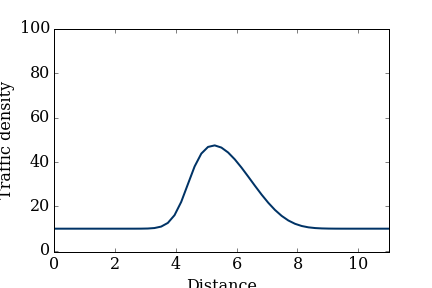
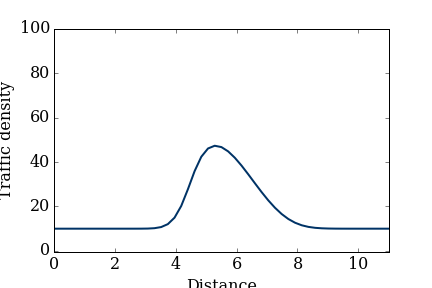
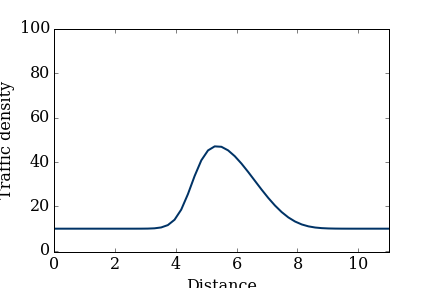
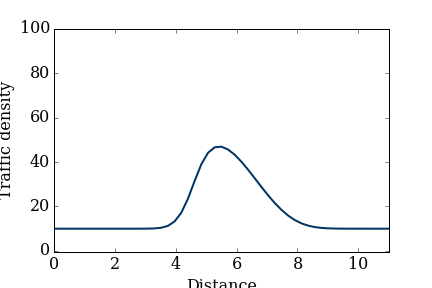
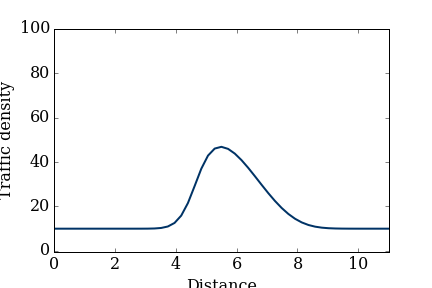
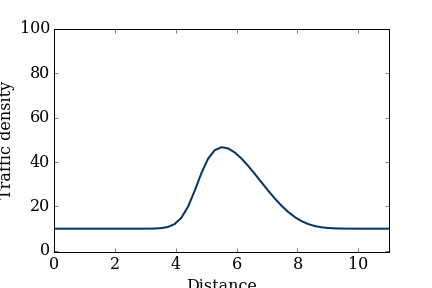
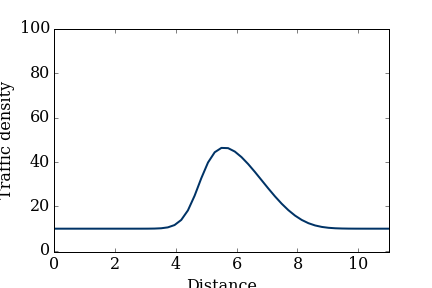
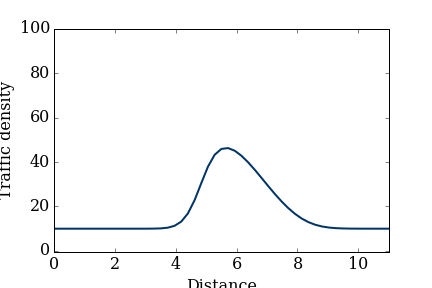
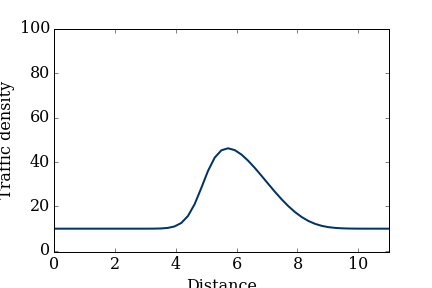
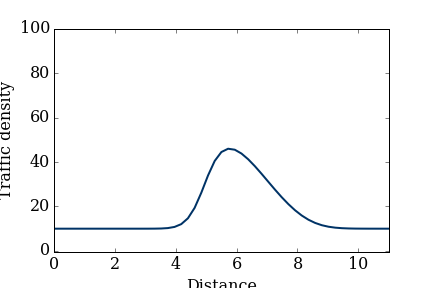
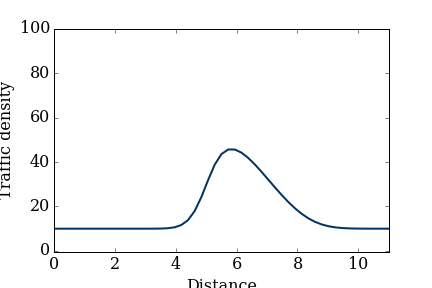
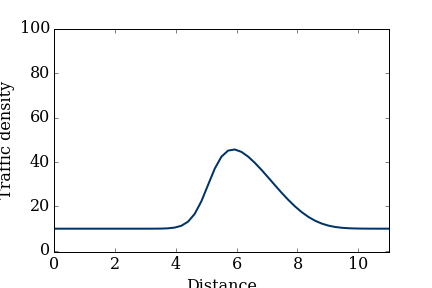
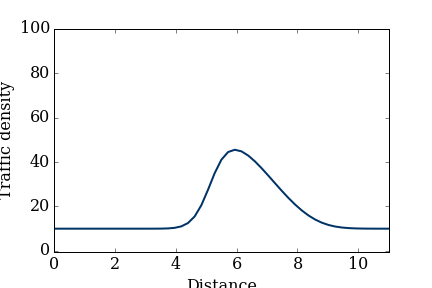
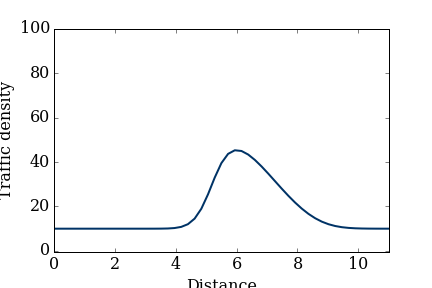
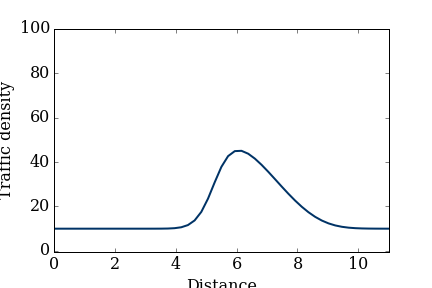
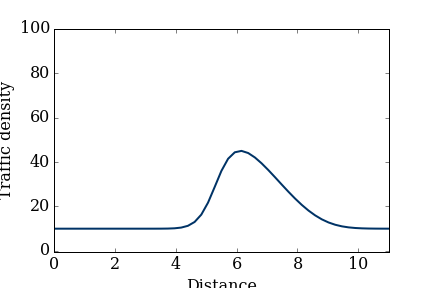
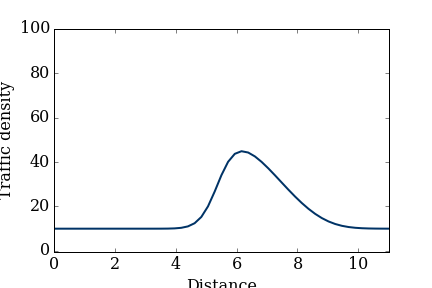
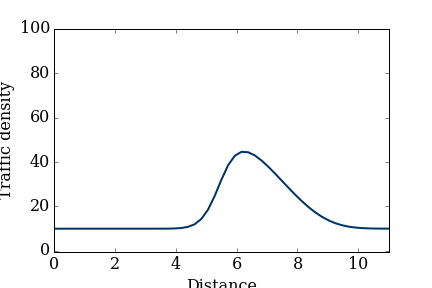
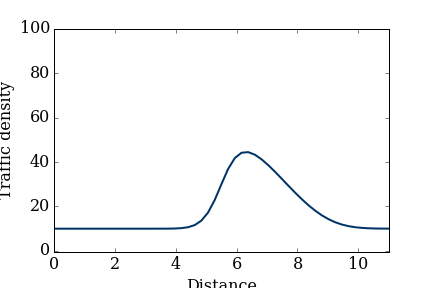
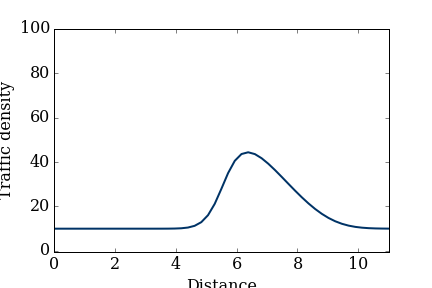
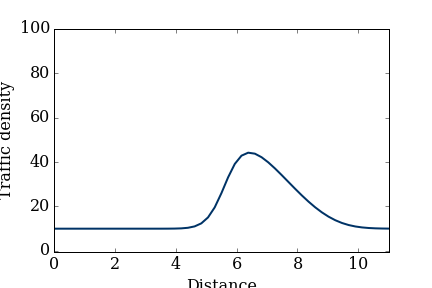
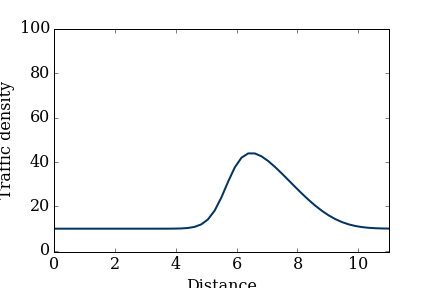
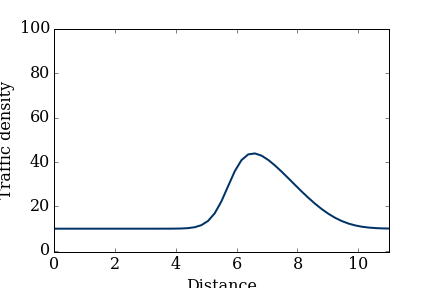
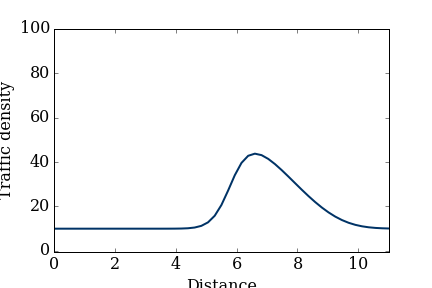
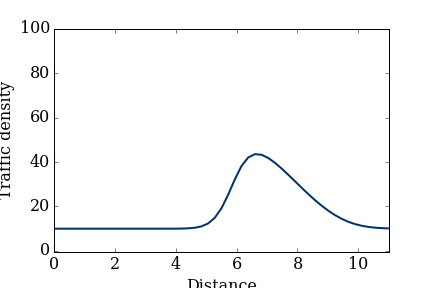
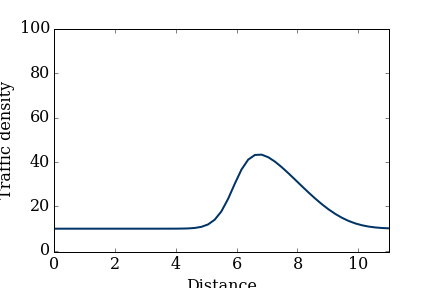
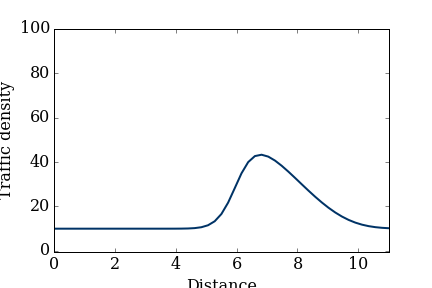
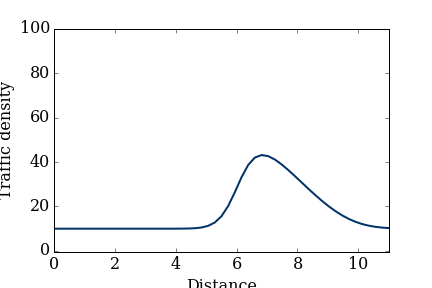
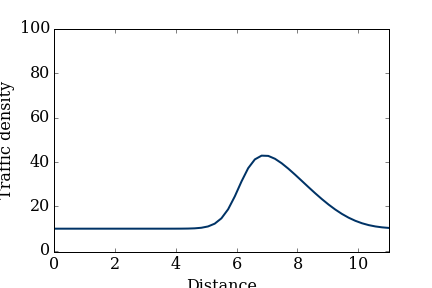
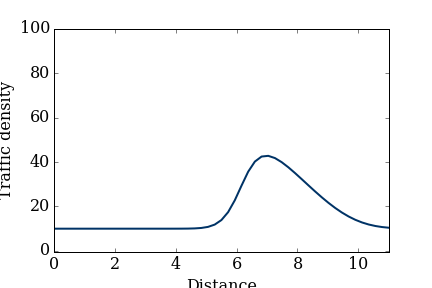
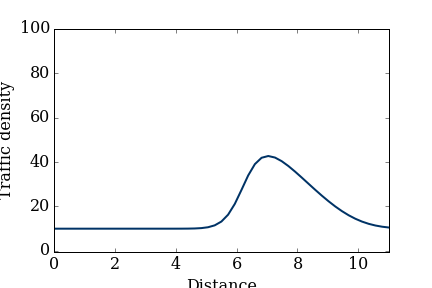
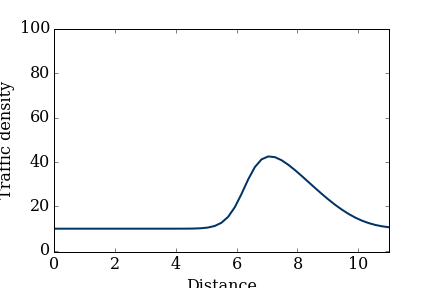
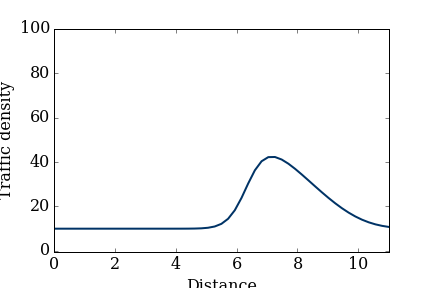
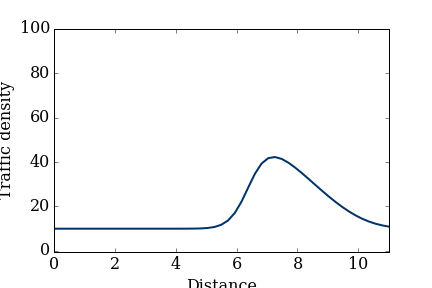
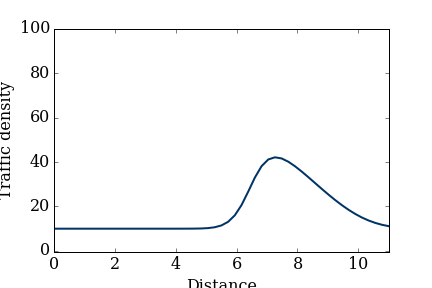
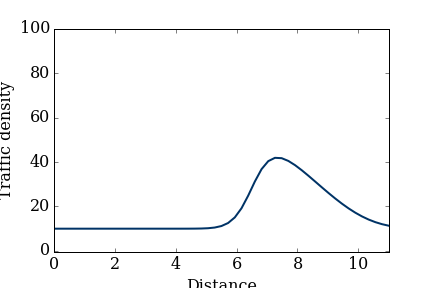
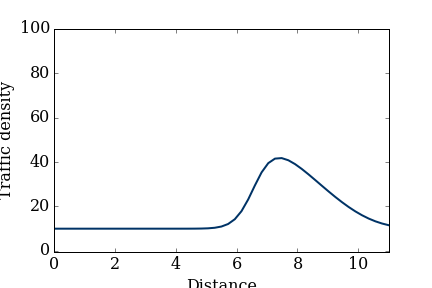
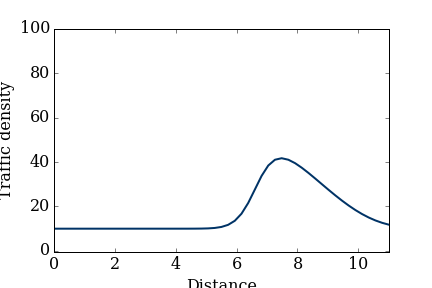
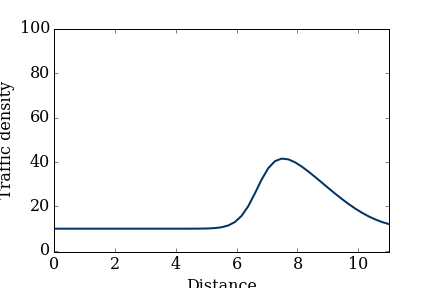
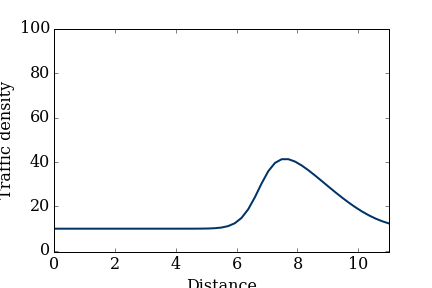
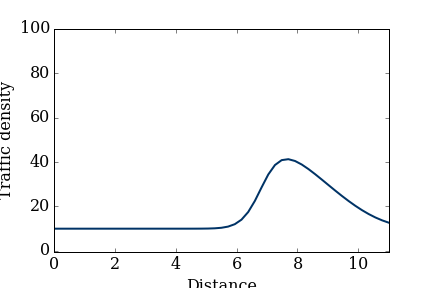
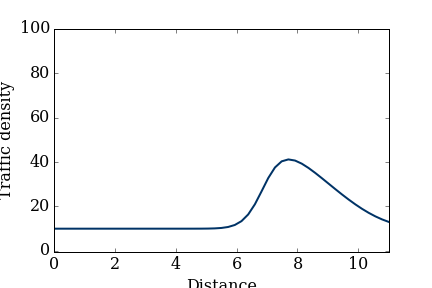
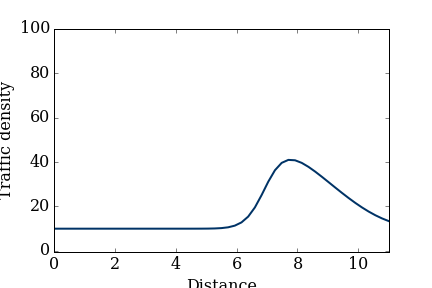
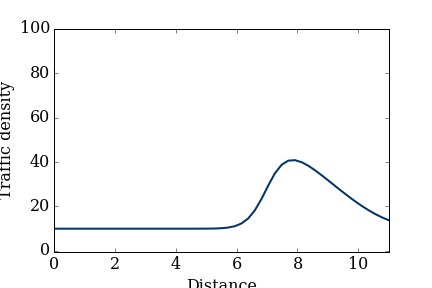
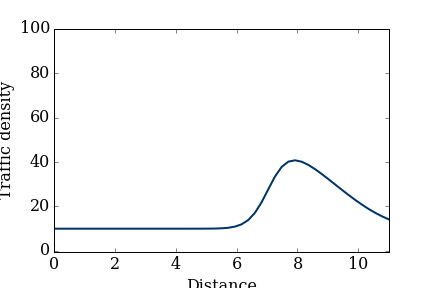
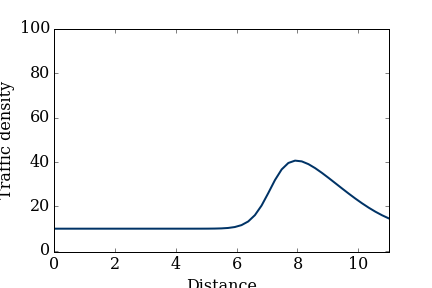
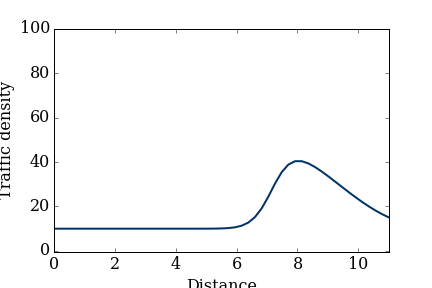
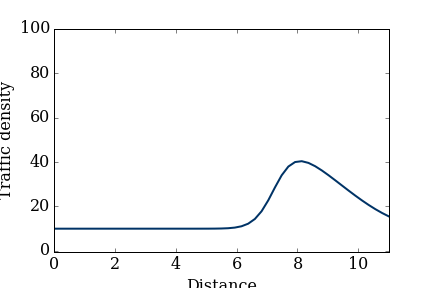
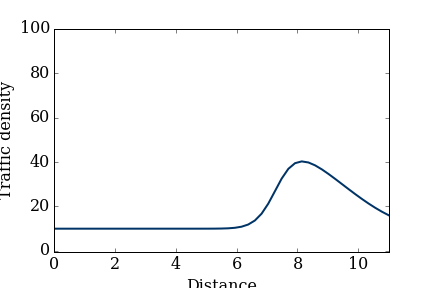
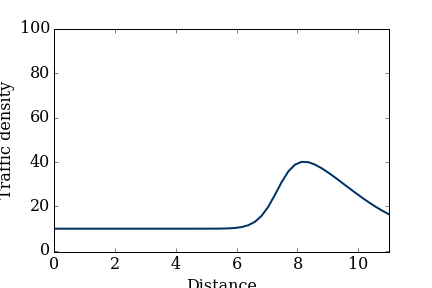
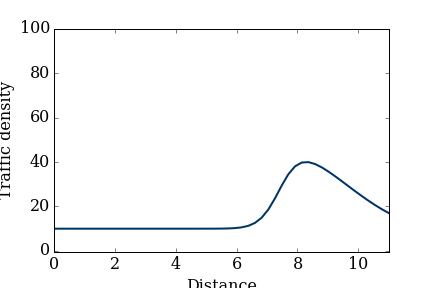
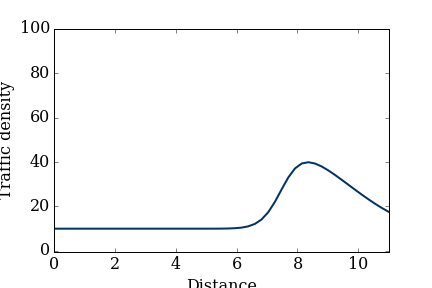
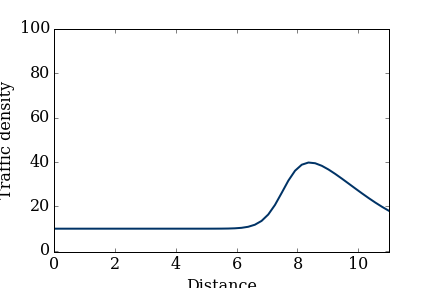
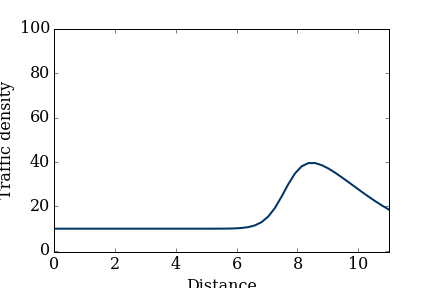
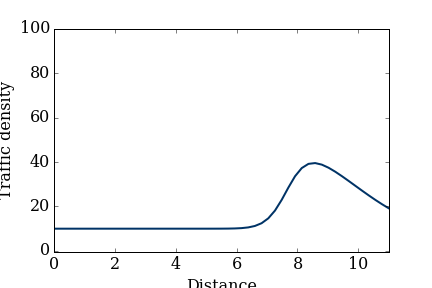
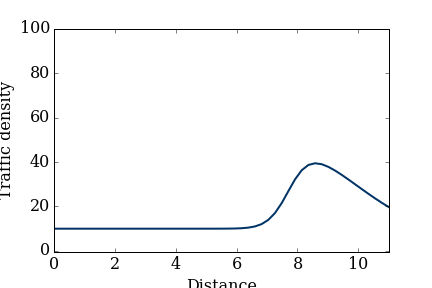
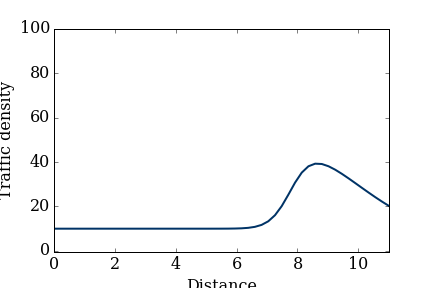
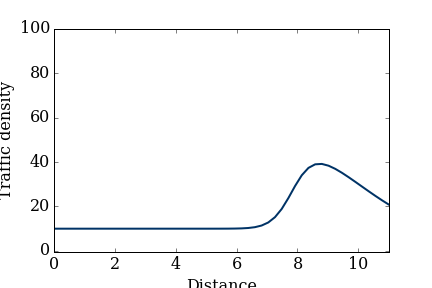
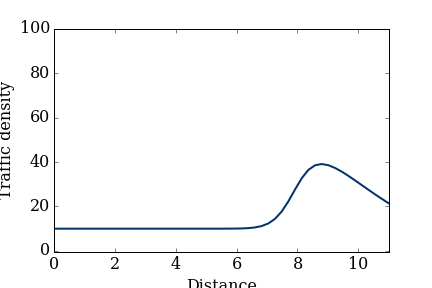
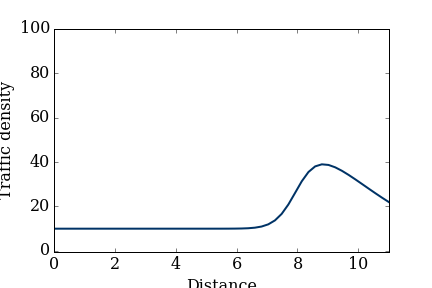
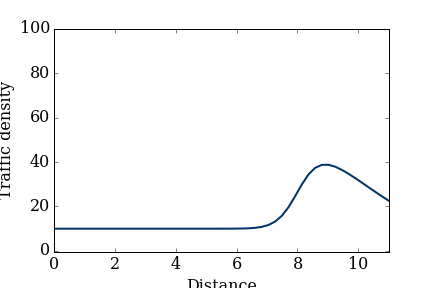
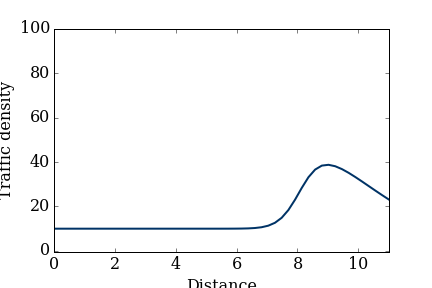
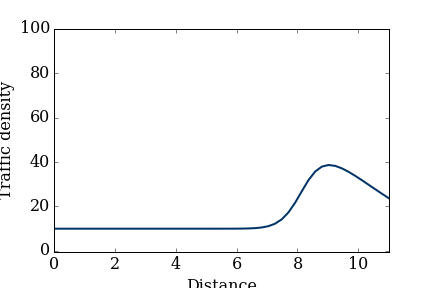
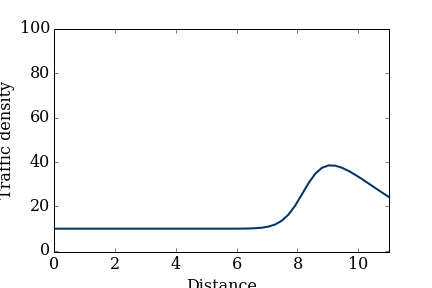
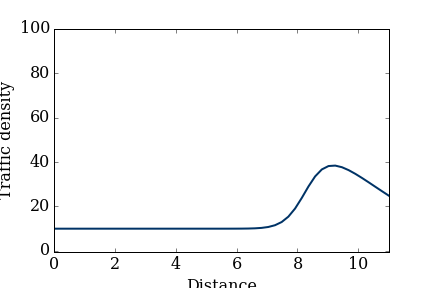
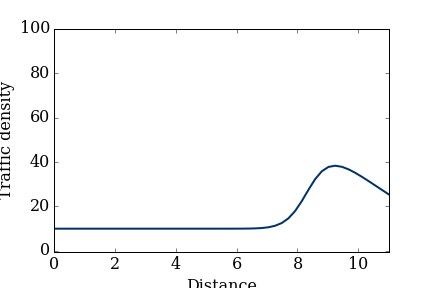
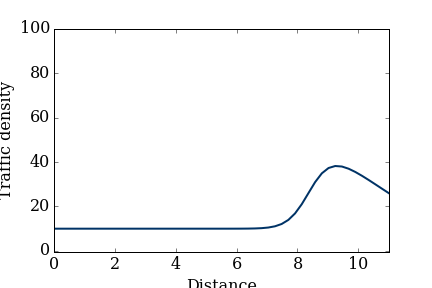
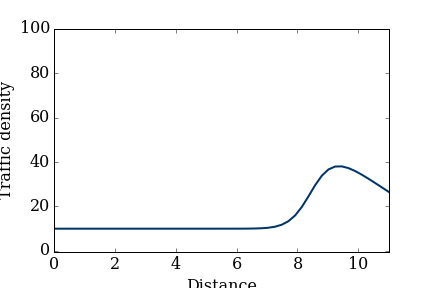
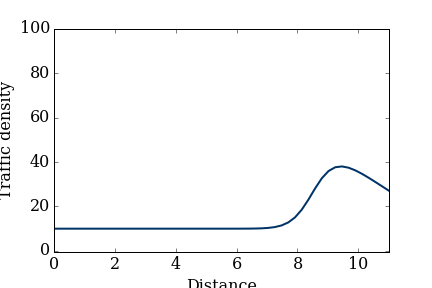
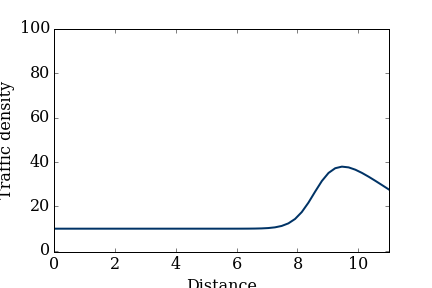
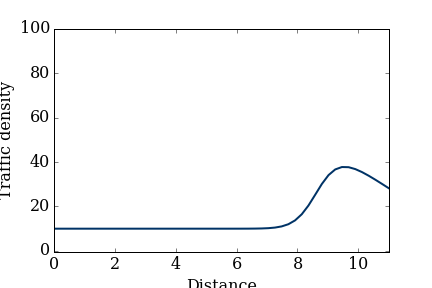
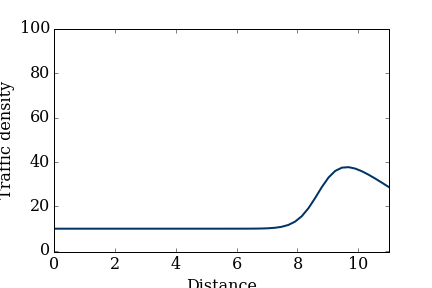
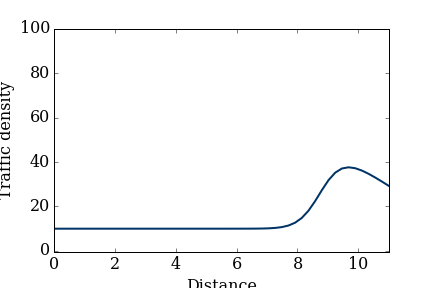
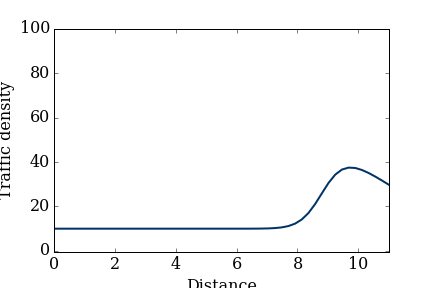
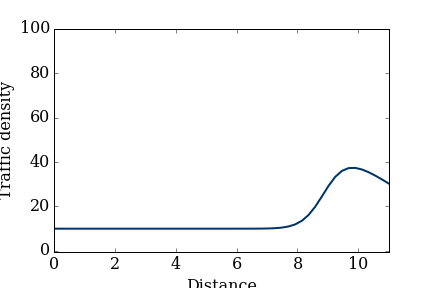
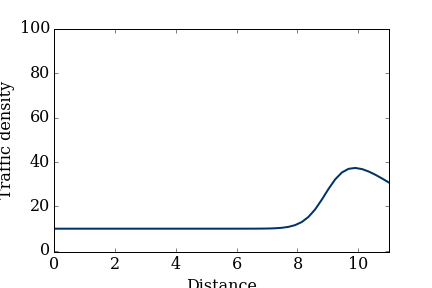
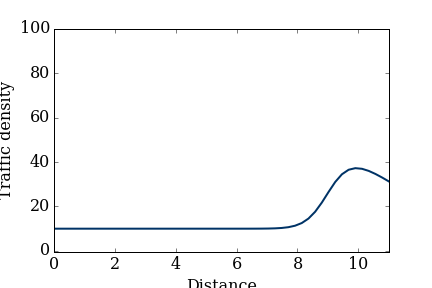
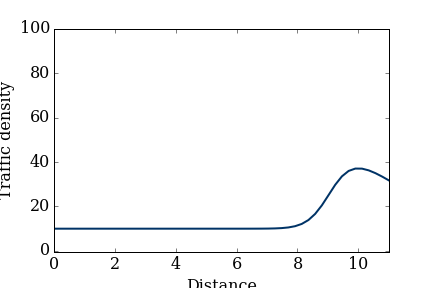
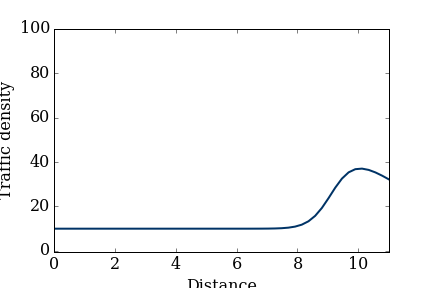
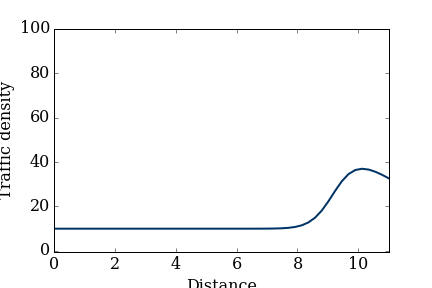
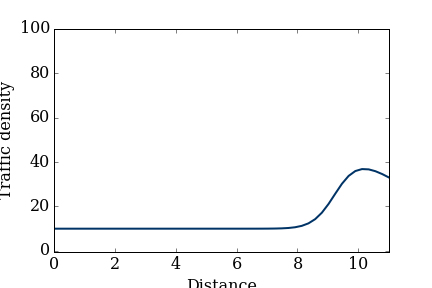
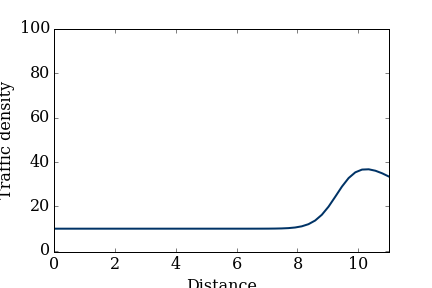

In [451]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,L),ylim=(-.5,100),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,L,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho, interval=50)
display_animation(anim, default_mode='once')

### Question: Average velocity at t = 3

In [412]:
vel_t3 = Velocity(V_max, rho[49,:] , rho_max)      #V_max*(1-rho3/float(rho_max))
vel_t3_conv = conversion(vel_t3)
vel_t3_conv_mean = numpy.mean(vel_t3_conv)
min_vel_t3 = conversion(min(vel_t0))
print("The average velocity at t=3 is {}.".format(vel_t3_conv_mean))
print("The minimum velocity at t=3 is {}.".format(min_vel_t3))


The average velocity at t=3 is 20.636165902363906.
The minimum velocity at t=3 is 17.77777777777778.


### Question: Average velocity at t = 6

In [415]:
vel_t6 = V_max*(1-rho[99,:]/float(rho_max))
vel_t6_conv = conversion(vel_t6)
vel_t6_conv_min = min(vel_t6_conv)
print("The minimum velocity at t=6 is {}.".format(vel_t6_conv_min))

The minimum velocity at t=6 is 18.776651614718308.
